In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
from numpy import log, exp, sqrt

In [2]:
S0 = 100.    # asset price at t=0
K = 100.     # strike price
T = 1.       # delivery time
r = 0.1      # risk free interest rate
sigma = 0.25 # volatility
t=0          # intiial time

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES theoretical prices ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES theoretical prices ==
call:  14.975790778311286
put:  5.4595325819072364


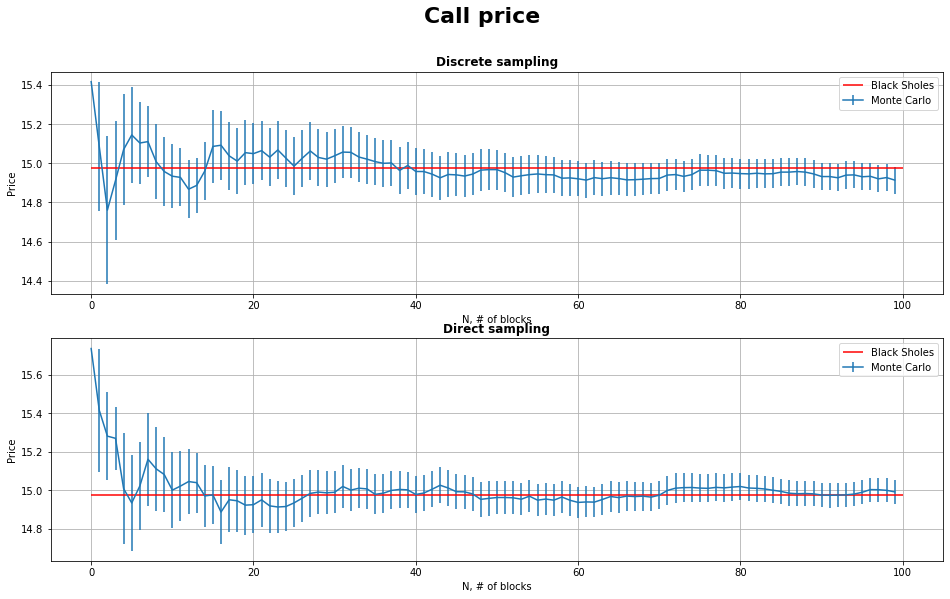

In [3]:
x1,y1,err1=np.loadtxt("build/results03.1.1.call.discretized_sampling.dat",usecols=(0,1,2),unpack=True)
x2,y2,err2=np.loadtxt("build/results03.1.1.call.direct_sampling.dat",usecols=(0,1,2),unpack=True)
fig=plt.figure(figsize=(16, 9))
fig.suptitle("Call price", size=22, ha='center', weight='bold')

plt.subplot(211)
plt.errorbar(x1,y1,yerr=err1, label='Monte Carlo')
plt.hlines(14.975790778311286, 0, 100,color='red', label='Black Sholes')
plt.xlabel('N, # of blocks')
plt.ylabel('Price')
plt.title("Discrete sampling",size='large', weight='bold')
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.errorbar(x2,y2,yerr=err2, label='Monte Carlo')
plt.hlines(14.975790778311286, 0, 100, color='red',label='Black Sholes')
plt.xlabel('N, # of blocks')
plt.ylabel('Price')
plt.title("Direct sampling",size='large', weight='bold')
plt.legend()
plt.grid(True)


plt.grid(True)
plt.show()

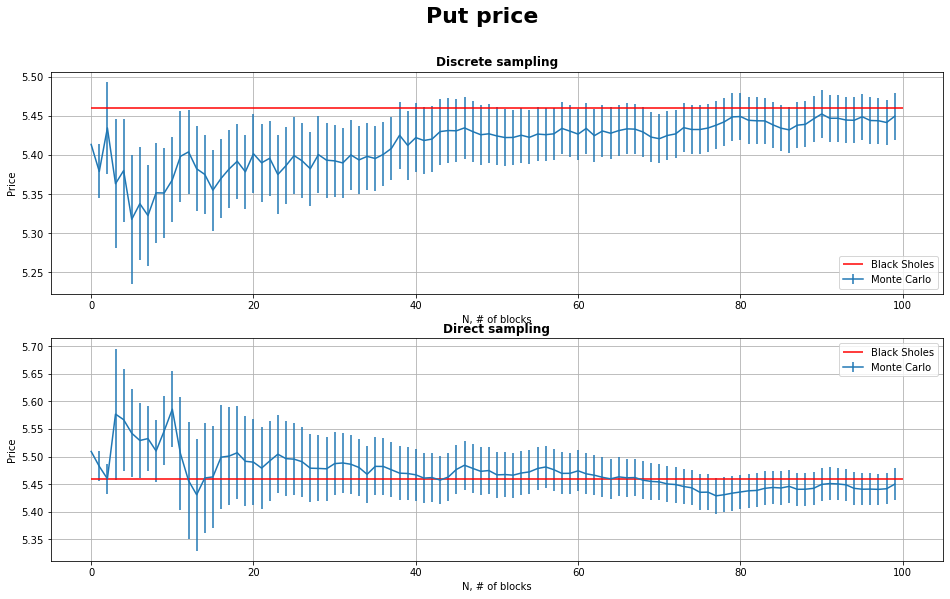

In [4]:
x1,y1,err1=np.loadtxt("build/results03.1.1.put.discretized_sampling.dat",usecols=(0,1,2),unpack=True)
x2,y2,err2=np.loadtxt("build/results03.1.1.put.direct_sampling.dat",usecols=(0,1,2),unpack=True)
fig=plt.figure(figsize=(16, 9))
fig.suptitle("Put price", size=22, ha='center', weight='bold')

plt.subplot(211)
plt.errorbar(x1,y1,yerr=err1, label='Monte Carlo')
plt.hlines(5.4595325819072364, 0, 100,color='red', label='Black Sholes')
plt.xlabel('N, # of blocks')
plt.ylabel('Price')
plt.title("Discrete sampling",size='large', weight='bold')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(212)
plt.errorbar(x2,y2,yerr=err2, label='Monte Carlo')
plt.hlines(5.4595325819072364, 0, 100, color='red',label='Black Sholes')
plt.xlabel('N, # of blocks')
plt.ylabel('Price')
plt.title("Direct sampling",size='large', weight='bold')
plt.legend()
plt.grid(True)


plt.grid(True)
plt.show()